<a href="https://colab.research.google.com/github/kgodberson/ccode/blob/master/Week_4_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#from google.colab import files
#uploaded = files.upload()

In [ ]:

import io 
import pandas as pd
import numpy as np
df = pd.read_csv('https://raw.githubusercontent.com/hantsw/wk4_assignment/master/Austin_Public_Health_Diabetes_Self-Management_Education_Participant_Demographics_2015-2017%20(2).csv')
#df = pd.read_csv(io.BytesIO(uploaded['diabetes dataset.csv']))
#data = pd.read_csv ('diabetes dataset.csv') 
#df='diabetes'
diabetes = df 
diabetes 

,Class,Class Language,Age,Year,Gender,Insurance Category,Medical Home Category,Race/Ethnicity,Education Level,Diabetes Status (Yes/No),Heart Disease (Yes/No),High Blood Pressure (Yes/No),Tobacco Use (Yes/No),Previous Diabetes Education (Yes/No),Diabetes Knowledge,Fruits & Vegetable Consumption,Sugar-Sweetened Beverage Consumption,Food Measurement,Carbohydrate Counting,Exercise,Problem Area in Diabetes (PAID) Scale Score,ZIP code (address),ZIP code (city),ZIP code (state),ZIP code (zip)
0,EB,Spanish,35.0,2015,F,None,El Buen Samaritano,Hispanic/Latino,NaN,Yes,No,Yes,No,No,Fair,1-2,1,0 days,0 days,0 days,28.75,NaN,NaN,NaN,NaN
1,EB,Spanish,37.0,2016,F,None,NaN,Hispanic/Latino,1-8,Yes,NaN,No,No,No,NaN,3-4,3 or more,I don't know how,I don't know how,1 day,72.50,NaN,NaN,NaN,NaN
2,APH,Chinese/English,NaN,2017,NaN,NaN,NaN,Asian,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,EB,Spanish,52.0,2015,F,None,El Buen Samaritano,Hispanic/Latino,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,APH,English,60.0,2015,M,Medicaid,Seton Clinics,White,NaN,Yes,No,Yes,No,Yes,Fair,1-2,1,0 days,0 days,5 or more days,11.25,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1683,PCHW,Spanish,58.0,2015,F,Other,CommUnityCare,Hispanic/Latino,NaN,No,No,No,No,No,Good,1-2,1,0 days,0 days,1 day,NaN,NaN,NaN,NaN,78724.0
1684,APH,English,47.0,2016,F,Private insurance,Doctor's Office,American Indian,College,Yes,No,No,No,Yes,NaN,3-4,0,0 days,0 days,1 day,13.75,NaN,NaN,NaN,78741.0
1685,PCHW,Spanish,35.0,2015,F,Other,NaN,Hispanic/Latino,NaN,No,No,No,No,No,Fair,1-2,2,I don't know how,I don't know how,1 day,NaN,NaN,NaN,NaN,78758.0
1686,ARCF,English,58.0,2015,F,MediCARE,NaN,Black/African American,1-8,NaN,No,Yes,No,No,Fair,1-2,NaN,NaN,NaN,0 days,NaN,NaN,NaN,NaN,78753.0


In [ ]:
diabetes.head(10)

,Class,Class Language,Age,Year,Gender,Insurance Category,Medical Home Category,Race/Ethnicity,Education Level,Diabetes Status (Yes/No),Heart Disease (Yes/No),High Blood Pressure (Yes/No),Tobacco Use (Yes/No),Previous Diabetes Education (Yes/No),Diabetes Knowledge,Fruits & Vegetable Consumption,Sugar-Sweetened Beverage Consumption,Food Measurement,Carbohydrate Counting,Exercise,Problem Area in Diabetes (PAID) Scale Score,ZIP code (address),ZIP code (city),ZIP code (state),ZIP code (zip)
0,EB,Spanish,35.0,2015,F,None,El Buen Samaritano,Hispanic/Latino,NaN,Yes,No,Yes,No,No,Fair,1-2,1,0 days,0 days,0 days,28.75,NaN,NaN,NaN,NaN
1,EB,Spanish,37.0,2016,F,None,NaN,Hispanic/Latino,1-8,Yes,NaN,No,No,No,NaN,3-4,3 or more,I don't know how,I don't know how,1 day,72.50,NaN,NaN,NaN,NaN
2,APH,Chinese/English,NaN,2017,NaN,NaN,NaN,Asian,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,EB,Spanish,52.0,2015,F,None,El Buen Samaritano,Hispanic/Latino,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,APH,English,60.0,2015,M,Medicaid,Seton Clinics,White,NaN,Yes,No,Yes,No,Yes,Fair,1-2,1,0 days,0 days,5 or more days,11.25,NaN,NaN,NaN,NaN
5,PCHW,Spanish,27.0,2015,F,NaN,NaN,Hispanic/Latino,1-8,Yes,No,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73.75,NaN,NaN,NaN,NaN
6,PCHW,Spanish,53.0,2015,F,Other,Doctor's Office,Hispanic/Latino,NaN,Yes,No,No,NaN,NaN,NaN,1-2,3 or more,0 days,0 days,3 days,88.75,NaN,NaN,NaN,NaN
7,APH,Spanish,28.0,2017,F,None,CommUnityCare,Hispanic/Latino,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78741.0
8,PCHW,Spanish,53.0,2015,M,NaN,NaN,Hispanic/Latino,College,Yes,No,No,No,NaN,NaN,3-4,NaN,4 or more,NaN,NaN,15.00,NaN,NaN,NaN,NaN
9,ARCF,English,NaN,2016,NaN,MediCARE,Doctor's Office,White,College,Yes,No,Yes,No,Yes,Good,NaN,0,4 or more,4 or more,1 day,0.00,NaN,NaN,NaN,NaN


In [ ]:
list (df)

['Class',
 'Class Language',
 'Age',
 'Year',
 'Gender',
 'Insurance Category',
 'Medical Home Category',
 'Race/Ethnicity',
 'Education Level',
 'Diabetes Status (Yes/No)',
 'Heart Disease (Yes/No)',
 'High Blood Pressure (Yes/No)',
 'Tobacco Use (Yes/No)',
 'Previous Diabetes Education (Yes/No)',
 'Diabetes Knowledge',
 'Fruits & Vegetable Consumption',
 'Sugar-Sweetened Beverage Consumption',
 'Food Measurement',
 'Carbohydrate Counting',
 'Exercise',
 'Problem Area in Diabetes (PAID) Scale Score',
 'ZIP code (address)',
 'ZIP code (city)',
 'ZIP code (state)',
 'ZIP code (zip)']

In [ ]:
df.columns = df.columns.str.replace(' ','_')
df.columns = df.columns.str.replace('(','')
df.columns = df.columns.str.replace(')','')
df.columns = df.columns.str.replace('/','')
df.columns = df.columns.str.replace('&','')

list(df)

['Class',
 'Class_Language',
 'Age',
 'Year',
 'Gender',
 'Insurance_Category',
 'Medical_Home_Category',
 'RaceEthnicity',
 'Education_Level',
 'Diabetes_Status_YesNo',
 'Heart_Disease_YesNo',
 'High_Blood_Pressure_YesNo',
 'Tobacco_Use_YesNo',
 'Previous_Diabetes_Education_YesNo',
 'Diabetes_Knowledge',
 'Fruits__Vegetable_Consumption',
 'Sugar-Sweetened_Beverage_Consumption',
 'Food_Measurement',
 'Carbohydrate_Counting',
 'Exercise',
 'Problem_Area_in_Diabetes_PAID_Scale_Score',
 'ZIP_code_address',
 'ZIP_code_city',
 'ZIP_code_state',
 'ZIP_code_zip']

In [ ]:
df.dtypes

Class                                         object
Class_Language                                object
Age                                          float64
Year                                           int64
Gender                                        object
Insurance_Category                            object
Medical_Home_Category                         object
RaceEthnicity                                 object
Education_Level                               object
Diabetes_Status_YesNo                         object
Heart_Disease_YesNo                           object
High_Blood_Pressure_YesNo                     object
Tobacco_Use_YesNo                             object
Previous_Diabetes_Education_YesNo             object
Diabetes_Knowledge                            object
Fruits__Vegetable_Consumption                 object
Sugar-Sweetened_Beverage_Consumption          object
Food_Measurement                              object
Carbohydrate_Counting                         

#replace all Yes/No answers with numbers
#transition from categorical for numerical, hoping this will make visualizations easier to perform and interpret 
#No = 1
#Yes = 2
#may remove the NaN values to only look at intergers (??)

In [ ]:
cleanup_nums = {'Diabetes_Status_YesNo':{'No': 1, 'Yes': 2}}
cleanup_nums = {'High_Blood_Pressure_YesNo': {'No': 1, 'Yes': 2}}
cleanup_nums = {'Tobacco_Use_YesNo': {'No': 1, 'Yes': 2}}
cleanup_nums = {'Previous_Diabetes_Education_YesNo': {'No': 1, 'Yes': 2}}

In [ ]:
df.replace(cleanup_nums, inplace=True)
df.head()

,Class,Class_Language,Age,Year,Gender,Insurance_Category,Medical_Home_Category,RaceEthnicity,Education_Level,Diabetes_Status_YesNo,Heart_Disease_YesNo,High_Blood_Pressure_YesNo,Tobacco_Use_YesNo,Previous_Diabetes_Education_YesNo,Diabetes_Knowledge,Fruits__Vegetable_Consumption,Sugar-Sweetened_Beverage_Consumption,Food_Measurement,Carbohydrate_Counting,Exercise,Problem_Area_in_Diabetes_PAID_Scale_Score,ZIP_code_address,ZIP_code_city,ZIP_code_state,ZIP_code_zip
0,EB,Spanish,35.0,2015,F,None,El Buen Samaritano,Hispanic/Latino,NaN,Yes,No,Yes,No,1.0,Fair,1-2,1,0 days,0 days,0 days,28.75,NaN,NaN,NaN,NaN
1,EB,Spanish,37.0,2016,F,None,NaN,Hispanic/Latino,1-8,Yes,NaN,No,No,1.0,NaN,3-4,3 or more,I don't know how,I don't know how,1 day,72.50,NaN,NaN,NaN,NaN
2,APH,Chinese/English,NaN,2017,NaN,NaN,NaN,Asian,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,EB,Spanish,52.0,2015,F,None,El Buen Samaritano,Hispanic/Latino,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,APH,English,60.0,2015,M,Medicaid,Seton Clinics,White,NaN,Yes,No,Yes,No,2.0,Fair,1-2,1,0 days,0 days,5 or more days,11.25,NaN,NaN,NaN,NaN


#need to check for missing values
#try using isnull() and notnull() 

In [ ]:
df.isnull().sum()

Class                                           0
Class_Language                                  0
Age                                            32
Year                                            0
Gender                                         37
Insurance_Category                            113
Medical_Home_Category                          91
RaceEthnicity                                  37
Education_Level                               289
Diabetes_Status_YesNo                          30
Heart_Disease_YesNo                           100
High_Blood_Pressure_YesNo                      93
Tobacco_Use_YesNo                             124
Previous_Diabetes_Education_YesNo             125
Diabetes_Knowledge                            154
Fruits__Vegetable_Consumption                  52
Sugar-Sweetened_Beverage_Consumption           53
Food_Measurement                               63
Carbohydrate_Counting                          66
Exercise                                       78


In [ ]:
df.notnull().sum()

Class                                        1688
Class_Language                               1688
Age                                          1656
Year                                         1688
Gender                                       1651
Insurance_Category                           1575
Medical_Home_Category                        1597
RaceEthnicity                                1651
Education_Level                              1399
Diabetes_Status_YesNo                        1658
Heart_Disease_YesNo                          1588
High_Blood_Pressure_YesNo                    1595
Tobacco_Use_YesNo                            1564
Previous_Diabetes_Education_YesNo            1563
Diabetes_Knowledge                           1534
Fruits__Vegetable_Consumption                1636
Sugar-Sweetened_Beverage_Consumption         1635
Food_Measurement                             1625
Carbohydrate_Counting                        1622
Exercise                                     1610




#Dropping NaN values? Try code below fron Hant's Cheat Sheet
#code
#filtering out and dropping rows based on condition (e.g., where column_x values are null)
drop_rows = df[df[“column_x”].isnull()]
new_df = df[~df.isin(drop_rows)].dropna(how=’all’)



In [ ]:
# SUBSET 
paid = df.loc[df['Problem_Area_in_Diabetes_PAID_Scale_Score'].notnull()]
paid.groupby('Gender')['Problem_Area_in_Diabetes_PAID_Scale_Score'].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
F,449.0,45.601336,27.800214,0.00,21.250,42.50,68.75,100.00
M,175.0,40.800000,25.737038,0.00,20.625,38.75,61.25,100.00
f,1.0,81.250000,NaN,81.25,81.250,81.25,81.25,81.25


In [ ]:
paid.groupby(['Education_Level'])['Problem_Area_in_Diabetes_PAID_Scale_Score'].describe()

,count,mean,std,min,25%,50%,75%,max
Education_Level,,,,,,,,
1-8,140.0,55.535714,27.211594,0.0,33.750,56.875,80.0000,98.75
9-11,77.0,55.974026,27.575124,0.0,36.250,58.750,80.0000,100.00
College,110.0,33.784091,22.898772,0.0,15.000,32.500,48.4375,96.25
High School GED,115.0,39.663043,23.177733,0.0,23.125,38.750,53.7500,95.00
Some College,100.0,34.875000,25.144469,0.0,16.250,30.000,50.0000,95.00


In [ ]:
bool_series = pd.isnull(df["Education_Level"]) 
bool_series

0        True
1       False
2        True
3        True
4        True
        ...  
1683     True
1684    False
1685     True
1686    False
1687     True
Name: Education_Level, Length: 1688, dtype: bool

In [ ]:
bool_series = pd.notnull(df["Education_Level"]) 
bool_series


0       False
1        True
2       False
3       False
4       False
        ...  
1683    False
1684     True
1685    False
1686     True
1687    False
Name: Education_Level, Length: 1688, dtype: bool

In [ ]:
bool_series = pd.isnull(df["Insurance_Category"]) 
bool_series 

0       False
1       False
2        True
3       False
4       False
        ...  
1683    False
1684    False
1685    False
1686    False
1687    False
Name: Insurance_Category, Length: 1688, dtype: bool

In [ ]:
bool_series = pd.notnull(df ["Insurance_Category"]) 
bool_series

0        True
1        True
2       False
3        True
4        True
        ...  
1683     True
1684     True
1685     True
1686     True
1687     True
Name: Insurance_Category, Length: 1688, dtype: bool

#need to perform transformation 
#use the groupby example from class video and class notebook
#use groupby abd describe to find central tendency
#also use grouby for visualizations? only do groupby for a few variable? (like class how we focused a lot on year?)


In [ ]:
df_group = df.groupby('Fruits__Vegetable_Consumption')
df_group.describe()

Age             ... ZIP_code_zip         
                               count       mean  ...          75%      max
Fruits__Vegetable_Consumption                    ...                      
0                               77.0  47.038961  ...      78745.0  78759.0
1-2                            981.0  49.030581  ...      78747.0  78783.0
3-4                            414.0  49.664251  ...      78745.0  78762.0
5 or more                      105.0  51.333333  ...      78747.0  78763.0
Not Sure                        32.0  49.218750  ...      78741.0  78758.0

[5 rows x 64 columns]

In [ ]:
df_group = df.groupby('Sugar-Sweetened_Beverage_Consumption')
df_group.describe()

Age             ... ZIP_code_zip         
                                      count       mean  ...          75%      max
Sugar-Sweetened_Beverage_Consumption                    ...                      
0                                     454.0  53.623348  ...      78747.0  78778.0
1                                     696.0  47.935345  ...      78745.5  78781.0
2                                     302.0  46.837748  ...      78747.0  78762.0
3 or more                             125.0  47.280000  ...      78745.0  78758.0
Not Sure                               30.0  48.233333  ...      78742.0  78763.0

[5 rows x 64 columns]

In [ ]:
df_group = df.groupby('Class')
df_group.describe()

Age                              ... ZIP_code_zip                           
       count       mean        std   min  ...          25%      50%      75%      max
Class                                     ...                                        
APH    786.0  46.611959  15.384691  16.0  ...      78723.0  78744.0  78748.0  78767.0
ARCF   417.0  57.853717  14.684181  21.0  ...      78702.0  78723.0  78744.0  78767.0
EB     297.0  47.885522  12.027012  18.0  ...      78640.0  78731.0  78745.0  78781.0
PCHW   156.0  42.487179  11.288868  18.0  ...      78723.0  78744.0  78752.0  78783.0

[4 rows x 64 columns]

#Visualizations

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sb



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/hantsw/wk4_assignment/master/Austin_Public_Health_Diabetes_Self-Management_Education_Participant_Demographics_2015-2017%20(2).csv')
df.head(10)

,Class,Class Language,Age,Year,Gender,Insurance Category,Medical Home Category,Race/Ethnicity,Education Level,Diabetes Status (Yes/No),Heart Disease (Yes/No),High Blood Pressure (Yes/No),Tobacco Use (Yes/No),Previous Diabetes Education (Yes/No),Diabetes Knowledge,Fruits & Vegetable Consumption,Sugar-Sweetened Beverage Consumption,Food Measurement,Carbohydrate Counting,Exercise,Problem Area in Diabetes (PAID) Scale Score,ZIP code (address),ZIP code (city),ZIP code (state),ZIP code (zip)
0,EB,Spanish,35.0,2015,F,None,El Buen Samaritano,Hispanic/Latino,NaN,Yes,No,Yes,No,No,Fair,1-2,1,0 days,0 days,0 days,28.75,NaN,NaN,NaN,NaN
1,EB,Spanish,37.0,2016,F,None,NaN,Hispanic/Latino,1-8,Yes,NaN,No,No,No,NaN,3-4,3 or more,I don't know how,I don't know how,1 day,72.50,NaN,NaN,NaN,NaN
2,APH,Chinese/English,NaN,2017,NaN,NaN,NaN,Asian,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,EB,Spanish,52.0,2015,F,None,El Buen Samaritano,Hispanic/Latino,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,APH,English,60.0,2015,M,Medicaid,Seton Clinics,White,NaN,Yes,No,Yes,No,Yes,Fair,1-2,1,0 days,0 days,5 or more days,11.25,NaN,NaN,NaN,NaN
5,PCHW,Spanish,27.0,2015,F,NaN,NaN,Hispanic/Latino,1-8,Yes,No,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,73.75,NaN,NaN,NaN,NaN
6,PCHW,Spanish,53.0,2015,F,Other,Doctor's Office,Hispanic/Latino,NaN,Yes,No,No,NaN,NaN,NaN,1-2,3 or more,0 days,0 days,3 days,88.75,NaN,NaN,NaN,NaN
7,APH,Spanish,28.0,2017,F,None,CommUnityCare,Hispanic/Latino,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,78741.0
8,PCHW,Spanish,53.0,2015,M,NaN,NaN,Hispanic/Latino,College,Yes,No,No,No,NaN,NaN,3-4,NaN,4 or more,NaN,NaN,15.00,NaN,NaN,NaN,NaN
9,ARCF,English,NaN,2016,NaN,MediCARE,Doctor's Office,White,College,Yes,No,Yes,No,Yes,Good,NaN,0,4 or more,4 or more,1 day,0.00,NaN,NaN,NaN,NaN


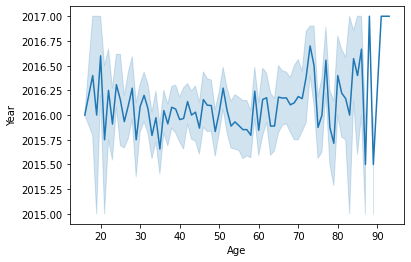

In [ ]:
ax = sb.lineplot(x ='Age', y = 'Year', data = df)

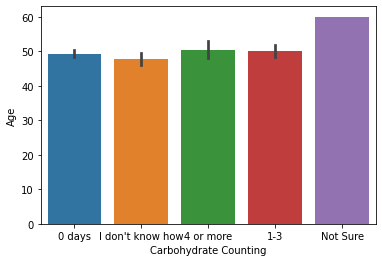

In [ ]:
ax=sb.barplot(y ='Age', x = 'Carbohydrate Counting', data = df)


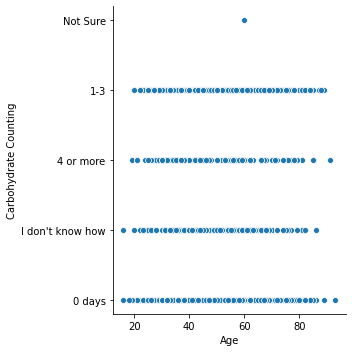

In [ ]:
sb.relplot('Age','Carbohydrate Counting', data=df)
